In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load old epic egg weights file
epic_egg = pd.read_csv("epic_egg_weights.csv")
epic_egg["p"] = epic_egg.loc[:,"Weight"]/epic_egg.loc[:,"Weight"].sum()

paradox = list(epic_egg[epic_egg["Label"] == "PARADOX"].iloc[:,0])
egg_only = list(epic_egg[epic_egg["Label"] == "EGGSCLUSIVE"].iloc[:,0])

all_egg_only = paradox+egg_only

In [4]:
#Load new epic egg weights file (thank you c4v)
epic_egg_new = pd.read_csv("epic_egg_weights_updated_fixed.csv")
epic_egg_new = epic_egg_new[:-1] #Drop the last row
epic_egg_new["p"] = epic_egg_new.loc[:,"Weight"]/epic_egg_new.loc[:,"Weight"].sum()

paradox_new = list(epic_egg_new[epic_egg_new["Label"] == "PARADOX"].iloc[:,0])
egg_only_new = list(epic_egg_new[epic_egg_new["Label"] == "EGGSCLUSIVE"].iloc[:,0])

all_egg_only_new = paradox_new + egg_only_new

In [5]:
#Read saved simulations
egg_realizations_df = pd.read_pickle("egg_simulation.pkl")
egg_realizations_update_df = pd.read_pickle("egg_simulation_updated_weights.pkl")

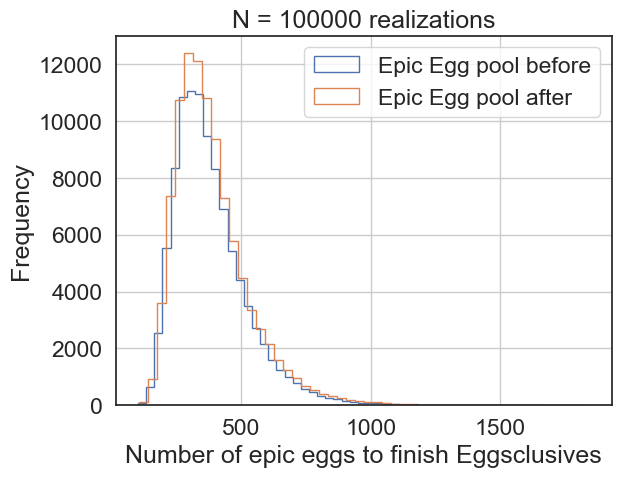

In [6]:
median = egg_realizations_df.counts.median()
tenth = egg_realizations_df.counts.quantile(0.1)
ninetieth = egg_realizations_df.counts.quantile(0.9)

sns.set(font_scale = 1.5, style = "white")
egg_realizations_df["counts"].hist(bins = 50, histtype = "step", label = "Epic Egg pool before")
egg_realizations_update_df["counts"].hist(bins = 50, histtype = "step", label = "Epic Egg pool after")
plt.xlabel("Number of epic eggs to finish Eggsclusives")
plt.ylabel("Frequency")
plt.title(f"N = {len(egg_realizations_df)} realizations")
# plt.axvline(tenth,color = 'g', ls = '--', label = f'10th percentile:{tenth}', alpha = 0.5)
# plt.axvline(ninetieth,color = 'r', ls = '--', label = f'90th percentile:{ninetieth}', alpha = 0.5)
plt.legend()


In [7]:
tenth = egg_realizations_df.counts.quantile(0.1)
median = egg_realizations_df.counts.quantile(0.5)
ninetieth = egg_realizations_df.counts.quantile(0.9)

tenth_new = egg_realizations_update_df.counts.quantile(0.1)
median_new = egg_realizations_update_df.counts.quantile(0.5)
ninetieth_new = egg_realizations_update_df.counts.quantile(0.9)

print(f"Median epic eggs to unlock epic eggsclusives before cost update: {median}")
print(f"Median epic eggs to unlock epic eggsclusives after cost update: {median_new}")

print(f"10th percentile (old): {tenth} epic eggs")
print(f"10th percentile (new): {tenth_new} epic eggs")

print(f"90th percentile (old): {ninetieth} epic eggs")
print(f"90th percentile (new): {ninetieth_new} epic eggs")

print(f"Average epic eggs to unlock epic eggsclusives before cost update: {egg_realizations_df.counts.mean()}")
print(f"Average epic eggs to unlock epic eggsclusives after cost update: {egg_realizations_update_df.counts.mean()}")

Median epic eggs to unlock epic eggsclusives before cost update: 355.0
Median epic eggs to unlock epic eggsclusives after cost update: 359.0
10th percentile (old): 235.0 epic eggs
10th percentile (new): 239.0 epic eggs
90th percentile (old): 565.0 epic eggs
90th percentile (new): 579.0 epic eggs
Average epic eggs to unlock epic eggsclusives before cost update: 382.91096
Average epic eggs to unlock epic eggsclusives after cost update: 389.47177


In [8]:
median * (256/7) #Approximate number of eggs to get median number of epic eggs

12982.857142857141

### Egg stats for full sim

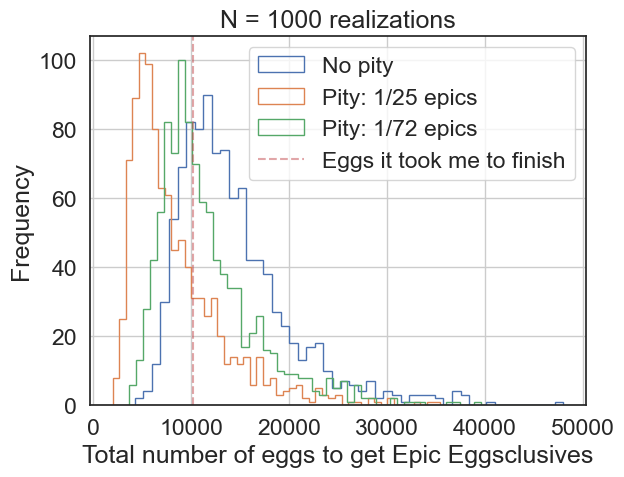

In [9]:
egg_realizations_df = pd.read_pickle("full_sim_no_pity_1k.pkl")
egg_realizations_df2 = pd.read_pickle("full_sim_25_pity_1k.pkl")
egg_realizations_df3 = pd.read_pickle("full_sim_72_pity_1k.pkl")

median = egg_realizations_df.counts.median()
tenth = egg_realizations_df.counts.quantile(0.1)
ninetieth = egg_realizations_df.counts.quantile(0.9)

sns.set(font_scale = 1.5, style = "white")
egg_realizations_df["counts"].hist(bins = 50, histtype = "step", label = "No pity")
egg_realizations_df2["counts"].hist(bins = 50, histtype = "step", label = "Pity: 1/25 epics")
egg_realizations_df3["counts"].hist(bins = 50, histtype = "step", label = "Pity: 1/72 epics")

plt.xlabel("Total number of eggs to get Epic Eggsclusives")
plt.ylabel("Frequency")
plt.title(f"N = {len(egg_realizations_df)} realizations")
# plt.axvline(tenth,color = 'g', ls = '--', label = f'10th percentile:{tenth}', alpha = 0.5)
plt.axvline(10200,color = 'r', ls = '--', label = "Eggs it took me to finish", alpha = 0.5)
plt.legend()

In [10]:
tenth = egg_realizations_df.counts.quantile(0.1)
median = egg_realizations_df.counts.quantile(0.5)
ninetieth = egg_realizations_df.counts.quantile(0.9)
print(f"Median eggs to get out of epic egg hell (without pity): {median}")
print(f"10th percentile: {tenth} eggs")
print(f"90th percentile: {ninetieth} eggs")
print(f"Average eggs to get out of epic egg hell (without pity): {egg_realizations_df.counts.mean()}")

Median eggs to get out of epic egg hell (without pity): 13020.5
10th percentile: 8578.6 eggs
90th percentile: 21807.9 eggs
Average eggs to get out of epic egg hell (without pity): 14341.248


In [11]:
tenth = egg_realizations_df2.counts.quantile(0.1)
median = egg_realizations_df2.counts.quantile(0.5)
ninetieth = egg_realizations_df2.counts.quantile(0.9)
print(f"Median eggs to get out of epic egg hell (with 1 epic egg per 25 eggs pity): {median}")
print(f"10th percentile: {tenth} eggs")
print(f"90th percentile: {ninetieth} eggs")
print(f"Average eggs to get out of epic egg hell (with 1 epic egg per 25 eggs pity): {egg_realizations_df2.counts.mean()}")

Median eggs to get out of epic egg hell (with 1 epic egg per 25 eggs pity): 6855.5
10th percentile: 3914.7 eggs
90th percentile: 14949.4 eggs
Average eggs to get out of epic egg hell (with 1 epic egg per 25 eggs pity): 8399.936


In [12]:
tenth = egg_realizations_df3.counts.quantile(0.1)
median = egg_realizations_df3.counts.quantile(0.5)
ninetieth = egg_realizations_df3.counts.quantile(0.9)
print(f"Median eggs to get out of epic egg hell (with 1 epic egg per 72 eggs pity): {median}")
print(f"10th percentile: {tenth:.2f} eggs")
print(f"90th percentile: {ninetieth:.2f} eggs")
print(f"Average eggs to get out of epic egg hell (with 1 epic egg per 72 eggs pity): {egg_realizations_df3.counts.mean()}")

Median eggs to get out of epic egg hell (with 1 epic egg per 72 eggs pity): 10261.5
10th percentile: 6653.10 eggs
90th percentile: 18244.30 eggs
Average eggs to get out of epic egg hell (with 1 epic egg per 72 eggs pity): 11606.583


Worst and best for no pity situation

In [41]:
worst = egg_realizations_df[egg_realizations_df["counts"] == egg_realizations_df["counts"].max()]["egg_data"].iloc[0]
best = egg_realizations_df[egg_realizations_df["counts"] == egg_realizations_df["counts"].min()]["egg_data"].iloc[0]

In [42]:
best = pd.Series(best)
best.iloc[best[~((best == "Common") | (best == "Rare") |(best == "Legendary") |(best == "Manaphy"))].index] = "Epic"

In [43]:
best.value_counts()

Common       3396
Rare          665
Epic          130
Manaphy        20
Legendary      20
Name: count, dtype: int64

In [44]:
worst = pd.Series(worst)

In [46]:
worst.iloc[~((worst == "Common") | (worst == "Rare") |(worst == "Legendary") |(worst == "Manaphy")).index]

48005    VICTINI
48004     Common
48003     Common
48002     Common
48001       Rare
          ...   
4         Common
3         Common
2           Rare
1         Common
0         Common
Length: 48006, dtype: object

In [40]:
worst.value_counts()

Epic    48006
Name: count, dtype: int64